In [1]:
print("test")

test


# Factors affecting HDB prices
=============================================================================

In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import re


# Data Cleaning
### - Handle null data, duplicate

##### Loading of HDB flat price from 2017 - 2023

In [3]:
hdb_data = pd.read_csv('HDB_dataset/completed_flat_price_2017_2023.csv')

In [4]:
hdb_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987


In [5]:
#Initial: 146872 rows, 14 columns
hdb_data.shape

(146872, 14)

In [6]:
col_check = ['flat_type', 'flat_model']

for col in col_check:
    print(hdb_data[col].unique())
    print()

['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']

['Improved' 'New Generation' 'DBSS' 'Standard' 'Apartment' 'Simplified'
 'Model A' 'Premium Apartment' 'Adjoined flat' 'Model A-Maisonette'
 'Maisonette' 'Type S1' 'Type S2' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'
 'Premium Apartment Loft' '2-room' '3Gen']



In [7]:
hdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146872 entries, 0 to 146871
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                146872 non-null  object 
 1   town                 146872 non-null  object 
 2   flat_type            146872 non-null  object 
 3   block                146872 non-null  object 
 4   street_name          146872 non-null  object 
 5   storey_range         146872 non-null  object 
 6   floor_area_sqm       146872 non-null  float64
 7   flat_model           146872 non-null  object 
 8   lease_commence_date  146872 non-null  int64  
 9   remaining_lease      146872 non-null  object 
 10  resale_price         146872 non-null  float64
 11  full_address         146872 non-null  object 
 12  Longitude            146842 non-null  float64
 13  Latitude             146872 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 15.7+ MB


In [8]:
hdb_data.duplicated().sum()

267

In [9]:
duplicated_rows = hdb_data.duplicated(keep=False)
duplicated = hdb_data[duplicated_rows]
duplicated

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,106 HENDERSON CRES Singapore,103.822396,1.288938
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,106 HENDERSON CRES Singapore,103.822396,1.288938
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0,271 QUEEN ST Singapore,103.853981,1.300938
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0,271 QUEEN ST Singapore,103.853981,1.300938
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0,265 TOH GUAN RD Singapore,103.744576,1.340698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140882,2022-11,WOODLANDS,4 ROOM,574A,WOODLANDS DR 16,04 TO 06,93.0,Model A,2018,94 years 08 months,525000.0,574A WOODLANDS DR 16 Singapore,103.797097,1.430111
141856,2022-12,HOUGANG,3 ROOM,1,HOUGANG AVE 3,10 TO 12,59.0,Improved,1975,51 years 08 months,320000.0,1 HOUGANG AVE 3 Singapore,103.892983,1.364173
141860,2022-12,HOUGANG,3 ROOM,1,HOUGANG AVE 3,10 TO 12,59.0,Improved,1975,51 years 08 months,320000.0,1 HOUGANG AVE 3 Singapore,103.892983,1.364173
142548,2022-12,SEMBAWANG,4 ROOM,120C,CANBERRA CRES,10 TO 12,93.0,Model A,2018,94 years 03 months,590000.0,120C CANBERRA CRES Singapore,103.832452,1.447033


##### Based on above result, the duplicated data is important. Dropping is not needed

In [10]:
hdb_data.isnull().sum()

month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
remaining_lease         0
resale_price            0
full_address            0
Longitude              30
Latitude                0
dtype: int64

In [11]:
null_val = hdb_data.isnull()
null = hdb_data[null_val.any(axis=1)]
null

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
1392,2017-02,BUKIT MERAH,5 ROOM,121A,KIM TIAN PL,10 TO 12,115.0,Improved,2001,83 years,810000.0,121A KIM TIAN PL Singapore,NaN,0.0
1395,2017-02,BUKIT MERAH,5 ROOM,121A,KIM TIAN PL,10 TO 12,115.0,Improved,2001,83 years,868000.0,121A KIM TIAN PL Singapore,NaN,0.0
5063,2017-04,JURONG WEST,EXECUTIVE,161,YUNG PING RD,04 TO 06,147.0,Apartment,1997,78 years 09 months,450000.0,161 YUNG PING RD Singapore,NaN,0.0
8329,2017-06,BUKIT MERAH,4 ROOM,121A,KIM TIAN PL,28 TO 30,101.0,Model A,2001,82 years 08 months,776000.0,121A KIM TIAN PL Singapore,NaN,0.0
8831,2017-06,JURONG WEST,EXECUTIVE,161,YUNG PING RD,01 TO 03,146.0,Maisonette,1997,78 years 07 months,500000.0,161 YUNG PING RD Singapore,NaN,0.0
10070,2017-07,BUKIT MERAH,4 ROOM,121A,KIM TIAN PL,01 TO 03,90.0,Model A,2001,82 years 07 months,645000.0,121A KIM TIAN PL Singapore,NaN,0.0
10566,2017-07,JURONG WEST,EXECUTIVE,161,YUNG PING RD,07 TO 09,148.0,Apartment,1997,78 years 06 months,540000.0,161 YUNG PING RD Singapore,NaN,0.0
11870,2017-08,BUKIT MERAH,4 ROOM,121A,KIM TIAN PL,13 TO 15,100.0,Model A,2001,82 years 07 months,725000.0,121A KIM TIAN PL Singapore,NaN,0.0
17314,2017-11,BUKIT MERAH,4 ROOM,121A,KIM TIAN PL,13 TO 15,100.0,Model A,2001,82 years 03 months,730000.0,121A KIM TIAN PL Singapore,NaN,0.0
17881,2017-11,JURONG WEST,EXECUTIVE,161,YUNG PING RD,04 TO 06,146.0,Apartment,1997,78 years 02 months,470000.0,161 YUNG PING RD Singapore,NaN,0.0


##### From the above, given that it is longtitude and 30 out of 14k, it is insignificant. Hence, will be remove

In [12]:
hdb_data.dropna(subset=['Longitude'], inplace=True)

In [13]:
# Updated rows
hdb_data.shape

(146842, 14)

##### Loading of HDB Consumer Price Index (CPI)

In [14]:
hdb_cpi = pd.read_csv('HDB_dataset/CPI_2000to2022Feb.csv')

In [15]:
hdb_cpi.head()

,Tranc_Yr,Tranc_Mth,CPI Housing
0,2000,January,75.962
1,2000,February,75.961
2,2000,March,75.961
3,2000,April,75.962
4,2000,May,75.962


In [16]:
#Initial: 278 rows, 3 columns
hdb_cpi.shape

(278, 3)

In [17]:
hdb_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tranc_Yr     278 non-null    int64  
 1   Tranc_Mth    278 non-null    object 
 2   CPI Housing  278 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ KB


In [18]:
hdb_cpi.duplicated().sum()

0

In [19]:
hdb_cpi.isnull().sum()

Tranc_Yr       0
Tranc_Mth      0
CPI Housing    0
dtype: int64

# Data Preprocessing

In [20]:
#Convert to DateTime datatype
hdb_data['month'] = pd.to_datetime(hdb_data['month'])

#Adding 'Tranc_Yr' and 'Tranc_Mth' columns
hdb_data['Tranc_Yr'] = hdb_data['month'].dt.year
hdb_data['Tranc_Mth'] = hdb_data['month'].dt.month_name()

hdb_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude,Tranc_Yr,Tranc_Mth
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941,2017,January
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242,2017,January
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760,2017,January
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223,2017,January
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987,2017,January


In [21]:
#Get the remaining_lease in year and month

# Split remaining_lease into year and month columns.
hdb_data[['remaining_yr', 'remaining_month']] = hdb_data['remaining_lease'].str.extract(r'(\d+) years? (\d+) months?')

#Convert null to Nan and fillna to 0 to change to int below
hdb_data['remaining_yr'] = pd.to_numeric(hdb_data['remaining_yr'], errors='coerce').fillna(0)
hdb_data['remaining_month'] = pd.to_numeric(hdb_data['remaining_month'], errors='coerce').fillna(0)



In [22]:
#Add month into year column and drop it
hdb_data['remaining_month'] = hdb_data['remaining_month'] / 12
hdb_data['remaining_yr'] = hdb_data['remaining_yr'] + hdb_data['remaining_month']
hdb_data.drop('remaining_month', axis=1, inplace=True)

In [23]:
hdb_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude,Tranc_Yr,Tranc_Mth,remaining_yr
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941,2017,January,61.333333
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242,2017,January,60.583333
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760,2017,January,62.416667
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223,2017,January,62.083333
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987,2017,January,62.416667


In [24]:
hdb_data = hdb_data.merge(hdb_cpi, on=['Tranc_Yr', 'Tranc_Mth'], how='left')

In [25]:
#Take into account CPI
#Calculate adjusted price and round to thousand
hdb_data['Adjusted_Price'] = np.round(hdb_data['resale_price'] * (109.35 / hdb_data['CPI Housing']), -2)

In [26]:
hdb_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude,Tranc_Yr,Tranc_Mth,remaining_yr,CPI Housing,Adjusted_Price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941,2017,January,61.333333,106.614,238000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242,2017,January,60.583333,106.614,256400.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760,2017,January,62.416667,106.614,268700.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223,2017,January,62.083333,106.614,271800.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987,2017,January,62.416667,106.614,271800.0


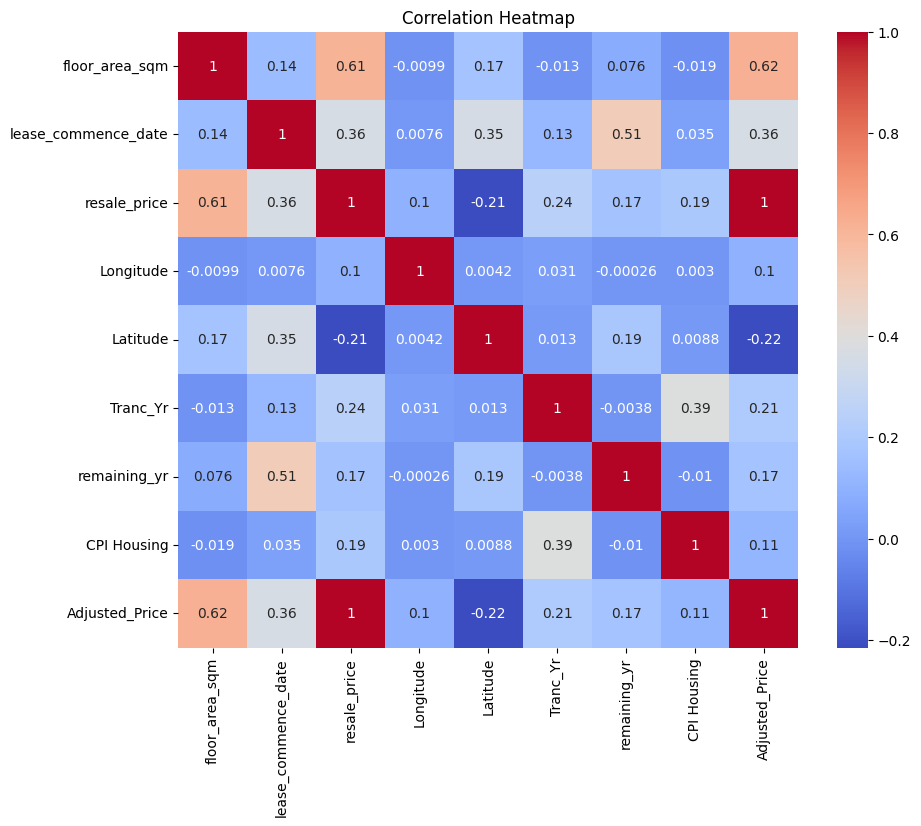

In [27]:
#Correlation between features
#Select float and integer columns
float_int = hdb_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = float_int.corr()

#Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

## Features selection

In [28]:
hdb_new = hdb_data[['Tranc_Yr', 'Tranc_Mth', 'town', 'flat_type', 'flat_model', 
                        'remaining_yr', 'floor_area_sqm', 'resale_price', 'Adjusted_Price']]

hdb_new

,Tranc_Yr,Tranc_Mth,town,flat_type,flat_model,remaining_yr,floor_area_sqm,resale_price,Adjusted_Price
0,2017,January,ANG MO KIO,2 ROOM,Improved,61.333333,44.0,232000.0,238000.0
1,2017,January,ANG MO KIO,3 ROOM,New Generation,60.583333,67.0,250000.0,256400.0
2,2017,January,ANG MO KIO,3 ROOM,New Generation,62.416667,67.0,262000.0,268700.0
3,2017,January,ANG MO KIO,3 ROOM,New Generation,62.083333,68.0,265000.0,271800.0
4,2017,January,ANG MO KIO,3 ROOM,New Generation,62.416667,67.0,265000.0,271800.0
...,...,...,...,...,...,...,...,...,...
146837,2023,February,YISHUN,5 ROOM,Improved,64.083333,127.0,700000.0,700000.0
146838,2023,February,YISHUN,5 ROOM,Improved,64.166667,122.0,700000.0,700000.0
146839,2023,February,YISHUN,EXECUTIVE,Apartment,68.416667,181.0,1068000.0,1068000.0
146840,2023,February,YISHUN,EXECUTIVE,Maisonette,64.833333,146.0,838000.0,838000.0


## Number of sales per year based on flat type

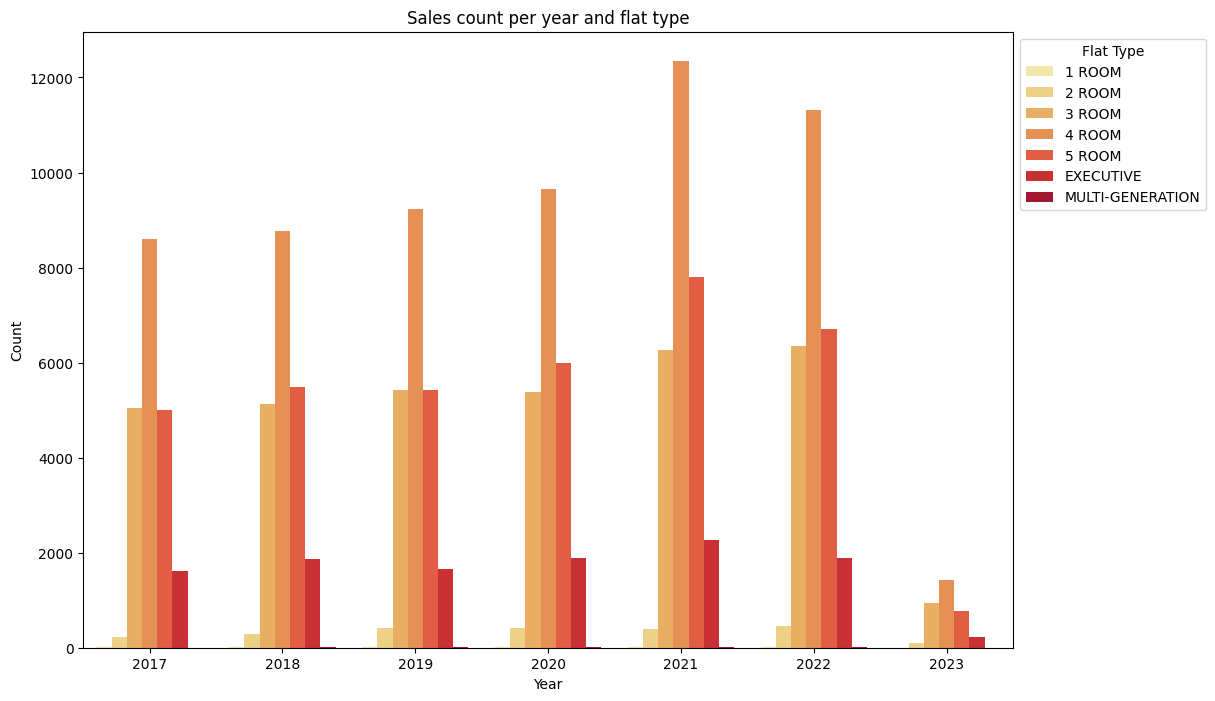

In [29]:
#Group by year and flat type to get sales count 
sales_count = hdb_new.groupby(['Tranc_Yr', 'flat_type']).size().reset_index(name = 'Count')

plt.figure(figsize = (12, 8))
sns.barplot(data = sales_count, x='Tranc_Yr', y='Count', hue='flat_type', palette='YlOrRd')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sales count per year and flat type')
plt.legend(title = 'Flat Type', bbox_to_anchor = (1, 1), loc = 'best')

plt.show()

## Average resale price based on area

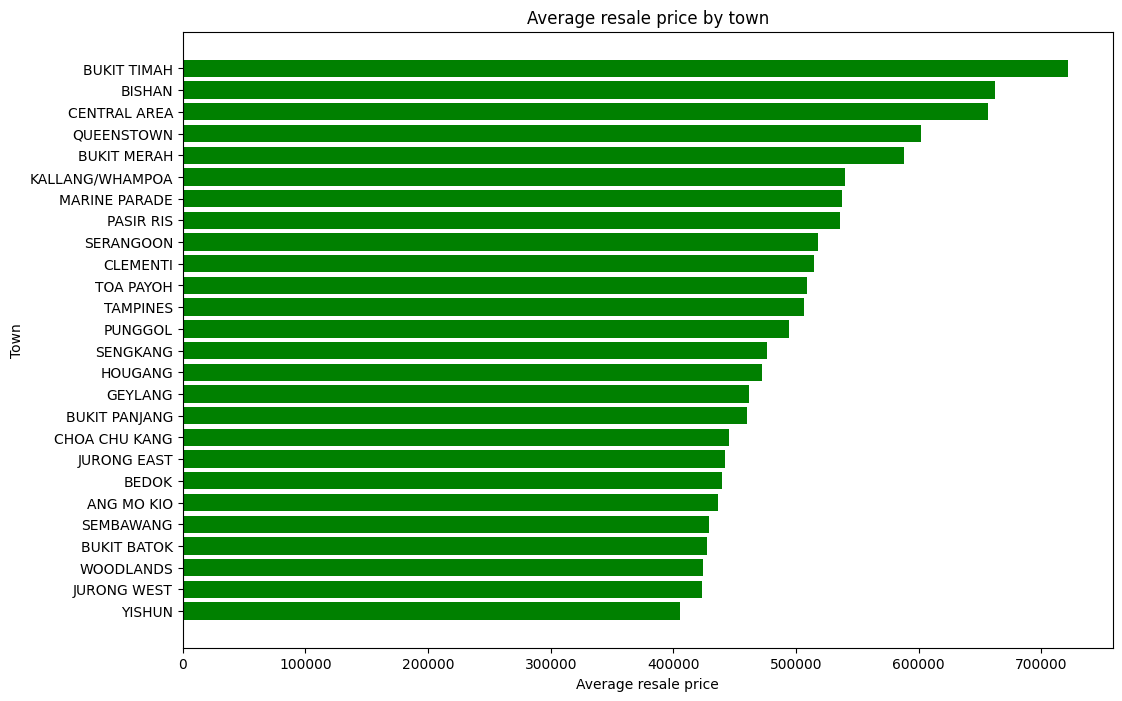

In [30]:
#Group by the town, average the price 
avg_town_price = hdb_new.groupby('town')['resale_price'].mean().reset_index()
avg_town_price = avg_town_price.sort_values('resale_price', ascending = True)

plt.figure(figsize = (12, 8))
plt.barh(avg_town_price['town'], avg_town_price['resale_price'], color='g')

plt.xlabel('Average resale price')
plt.ylabel('Town')
plt.title('Average resale price by town')

plt.show()

## Price of flat types based on floor area

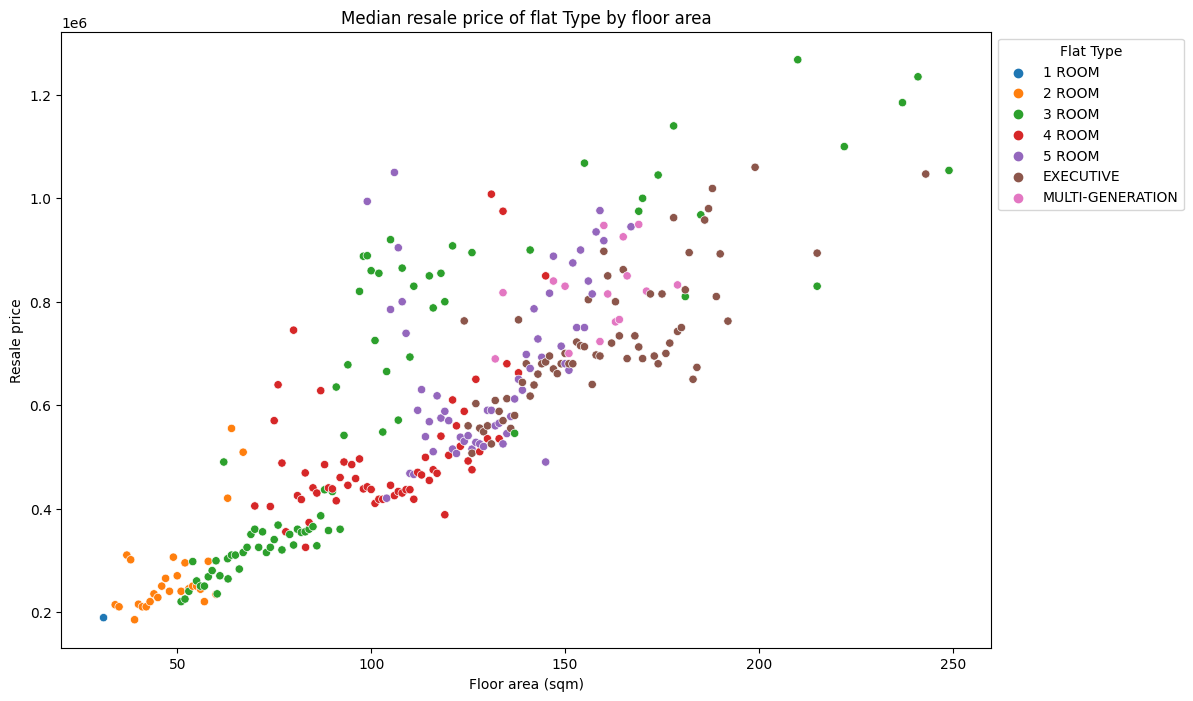

In [33]:
flr_area_price = hdb_data.groupby(['floor_area_sqm', 'flat_type'])['resale_price'].median().round()
flr_area_price = pd.DataFrame(flr_area_price).reset_index()

plt.figure(figsize=(12, 8))
yflr_area_price = sns.scatterplot(data=flr_area_price, x='floor_area_sqm', y='resale_price', hue='flat_type')

plt.xlabel("Floor area (sqm)")
plt.ylabel("Resale price")
plt.title("Median resale price of flat Type by floor area")
plt.legend(title = 'Flat Type', bbox_to_anchor = (1, 1), loc = 'best')

plt.show()